In [1]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import re
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df_train = pd.read_csv('./data/bikesharing_train.csv',parse_dates=["datetime"],encoding = 'utf-8')
df_train.shape

(10886, 12)

In [3]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# df_train.columns
# df_train.info()

In [5]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
# 모든 feature값의 상관계수 알기 : 별... 상관 없다.... 
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('tab20c'), axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.0,0.029,-0.0081,0.0089,0.26,0.26,0.19,-0.15,0.097,0.16,0.16
holiday,0.029,1.0,-0.25,-0.0071,0.00029,-0.0052,0.0019,0.0084,0.044,-0.021,-0.0054
workingday,-0.0081,-0.25,1.0,0.034,0.03,0.025,-0.011,0.013,-0.32,0.12,0.012
weather,0.0089,-0.0071,0.034,1.0,-0.055,-0.055,0.41,0.0073,-0.14,-0.11,-0.13
temp,0.26,0.00029,0.03,-0.055,1.0,0.98,-0.065,-0.018,0.47,0.32,0.39
atemp,0.26,-0.0052,0.025,-0.055,0.98,1.0,-0.044,-0.057,0.46,0.31,0.39
humidity,0.19,0.0019,-0.011,0.41,-0.065,-0.044,1.0,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.0084,0.013,0.0073,-0.018,-0.057,-0.32,1.0,0.092,0.091,0.1
casual,0.097,0.044,-0.32,-0.14,0.47,0.46,-0.35,0.092,1.0,0.5,0.69
registered,0.16,-0.021,0.12,-0.11,0.32,0.31,-0.27,0.091,0.5,1.0,0.97


## datetime 피쳐값을 년,월,시간으로 뽀개기

In [7]:
# 듀란듀란! 날짜 뽀개기
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second
df_train.shape

(10886, 18)

In [8]:
# df_train.head(20)

## 피쳐값 조정을 위해 모든 변수 *시.각.화* 하자구욧!!!

C:\Users\dotst\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

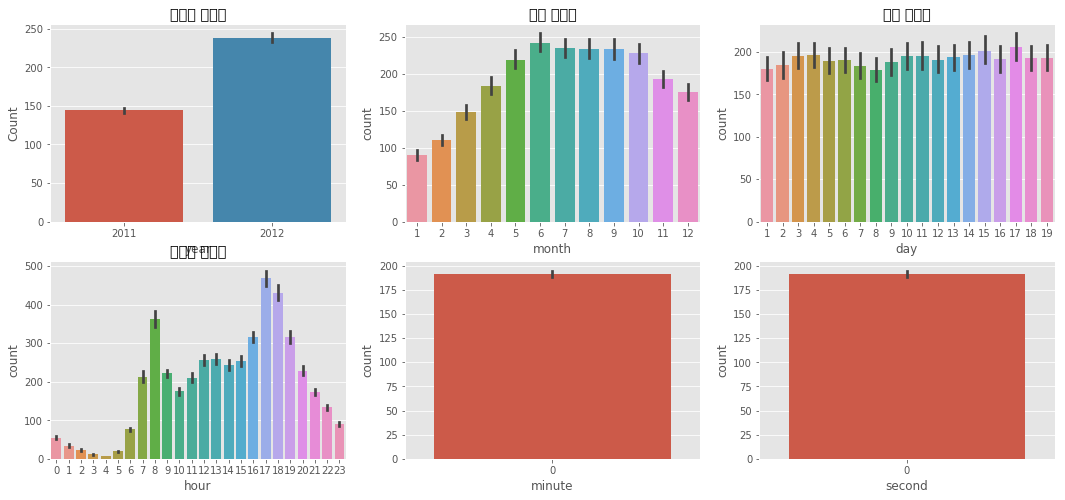

In [9]:
import seaborn as sns
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)
sns.barplot(data=df_train, x="month", y="count", ax=ax2)
sns.barplot(data=df_train, x="day", y="count", ax=ax3)
sns.barplot(data=df_train, x="hour", y="count", ax=ax4)
sns.barplot(data=df_train, x="minute", y="count", ax=ax5)
sns.barplot(data=df_train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

In [10]:
# df_train.columns

In [11]:
# df_train.info()

In [12]:
# df_train['windspeed'].value_counts()

In [13]:
# df_train['season'].value_counts()

In [14]:
# df_train['holiday'].value_counts()

In [15]:
# df
# _train['workingday'].value_counts()

In [16]:
# df_train['weather'].value_counts()

In [17]:
# df_train['temp'].value_counts()

In [18]:
# df_train['atemp'].value_counts()

In [19]:
# df_train['humidity'].value_counts()

In [20]:
# df_train['casual'].value_counts()

In [21]:
# df_train['registered'].value_counts()

In [22]:
# tmp_wind = df_train.loc[['windspeed' == 0], 'windspeed']

In [23]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = df_train.loc[df_train['windspeed'] == 0]
trainWindNot0 = df_train.loc[df_train['windspeed'] != 0]

In [24]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0,8,6,14,2011,1,1,9,0,0
64,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,0.0,8,102,110,2011,1,3,19,0,0


In [25]:
# df_train['day'].value_counts()

In [26]:
wind=np.random.normal(trainWindNot0['windspeed'].mean(), 1, 1313)
df_wind=pd.DataFrame(wind)
df_wind=df_wind.rename(columns={0:'wind'})
df_wind
# len(df_wind)

,wind
0,15.432041
1,13.962359
2,15.068494
3,14.664172
4,12.808147
5,14.131256
6,13.952396
7,12.758988
8,13.429722
9,14.864406


In [27]:
# df_train['count'].value_counts()

In [28]:
del df_train['atemp']

In [29]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,2011,1,1,4,0,0


In [30]:
trainWind0.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 10862
Data columns (total 18 columns):
datetime      1313 non-null datetime64[ns]
season        1313 non-null int64
holiday       1313 non-null int64
workingday    1313 non-null int64
weather       1313 non-null int64
temp          1313 non-null float64
atemp         1313 non-null float64
humidity      1313 non-null int64
windspeed     1313 non-null float64
casual        1313 non-null int64
registered    1313 non-null int64
count         1313 non-null int64
year          1313 non-null int64
month         1313 non-null int64
day           1313 non-null int64
hour          1313 non-null int64
minute        1313 non-null int64
second        1313 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(14)
memory usage: 194.9 KB


In [34]:
pd.merge(trainWind0,df_wind)
# len(trainWind0)
# len(df_wind)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False